In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
)
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
)
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
import warnings

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
#EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Age', ylabel='Count'>

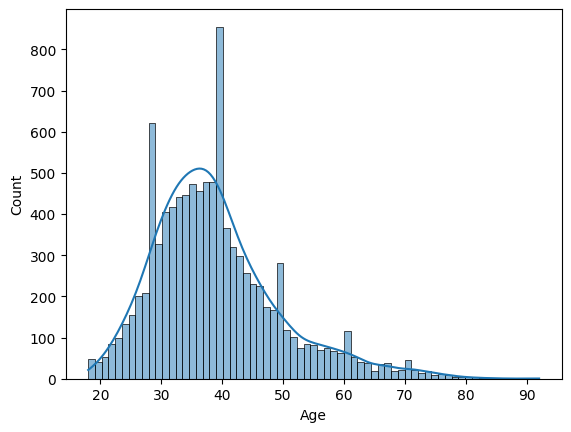

In [7]:
sns.histplot(data=df, x='Age', kde=True)

Text(0, 0.5, 'Müşteri Sayısı')

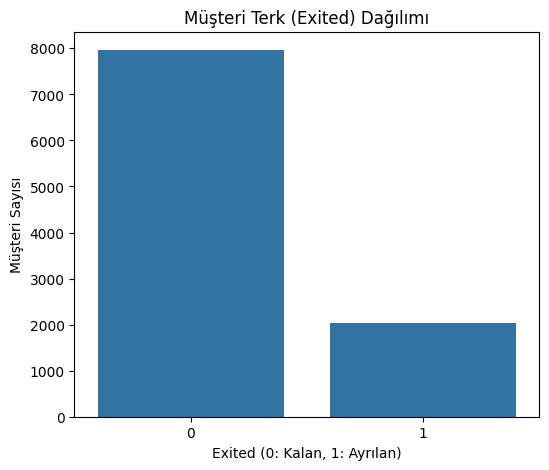

In [8]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Exited', data=df)
plt.title('Müşteri Terk (Exited) Dağılımı')
plt.xlabel('Exited (0: Kalan, 1: Ayrılan)')
plt.ylabel('Müşteri Sayısı')

In [9]:
df_numerical = df.select_dtypes(include=np.number)

<Axes: >

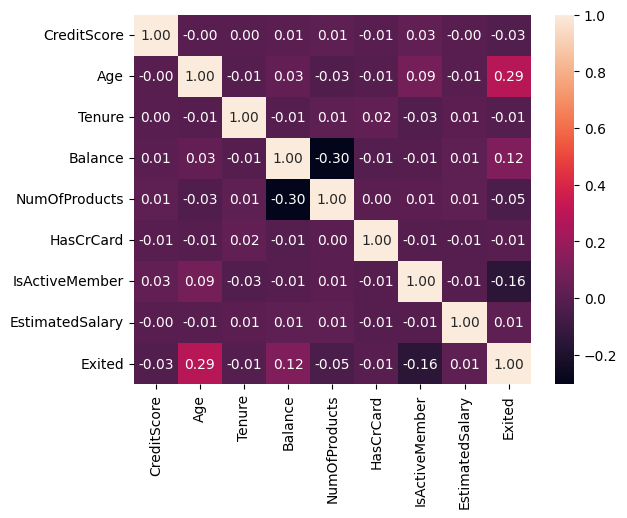

In [10]:
sns.heatmap(df_numerical.corr(),annot=True,fmt=".2f")

In [11]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
X = df.drop("Exited",axis=1)
y = df["Exited"]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
categorical_cols = ["Geography","Gender"]


In [27]:
#Feature Engineering

In [ ]:
#Encoding
preprocesser = ColumnTransformer(
    transformers=[
        ("1",OneHotEncoder(drop='first', handle_unknown='ignore'),categorical_cols)
    ],
      remainder='passthrough'
)

In [16]:
X_train = preprocesser.fit_transform(X_train)
X_test = preprocesser.transform(X_test)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=800),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "ExtraTrees": ExtraTreesClassifier(),
    "XGBoost": xgb.XGBClassifier(eval_metric="logloss"),
    "Lightgbm":lgb.LGBMClassifier()
      }

In [ ]:
#Trying different Models
for name, model in models.items():
    print(f"\n===== {name} =====")

    try:
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)

        cm = confusion_matrix(y_test, y_test_pred)
        cr = classification_report(y_test, y_test_pred)

       
        print(f"Train Accuracy: {train_acc}")
        print(f"Test Accuracy:  {test_acc}")
        print("\nConfusion Matrix:")
        print(cm)
        print("\nClassification Report:")
        print(cr)

        
    except Exception as e:
        print(f"❌ {name} hata verdi:", e)



===== LogisticRegression =====
Train Accuracy: 0.8124
Test Accuracy:  0.8072

Confusion Matrix:
[[1920   83]
 [ 399   98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2003
           1       0.54      0.20      0.29       497

    accuracy                           0.81      2500
   macro avg       0.68      0.58      0.59      2500
weighted avg       0.77      0.81      0.77      2500


===== KNN =====
Train Accuracy: 0.8705333333333334
Test Accuracy:  0.8304

Confusion Matrix:
[[1894  109]
 [ 315  182]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2003
           1       0.63      0.37      0.46       497

    accuracy                           0.83      2500
   macro avg       0.74      0.66      0.68      2500
weighted avg       0.81      0.83      0.81      2500


===== DecisionTree =====
Train Accuracy: 1.0
Test Ac

/Users/yagiz/Desktop/ml model 2/yeni_ortam_adi/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/yagiz/Desktop/ml model 2/yeni_ortam_adi/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [20]:
rf_param_dist = {
    'n_estimators': [100, 200, 300, 400, 500], 
    
    'max_depth': [5, 8, 10, 15, 20, None],
    
    'min_samples_leaf': [1, 2, 3, 4, 5],
    
    'min_samples_split': [2, 5, 10],
    
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
#Hyperparameter Tuning
rf_model = RandomForestClassifier(random_state=42)


rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_dist,
    n_iter=50, 
    cv=5, 
    scoring='accuracy', 
    verbose=2,
    random_state=42,
    n_jobs=-1 
)

print("RandomForest için Hiperparametre Ayarlaması Başlıyor...")
rf_search.fit(X_train, y_train)

print("\n=== RandomForest En İyi Sonuçlar ===")
print("En İyi Parametreler:", rf_search.best_params_)
print("En İyi CV (Eğitim) Skoru:", rf_search.best_score_)


rf_best_model = rf_search.best_estimator_

rf_train_pred = rf_best_model.predict(X_train)
rf_test_pred = rf_best_model.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)

print("\n--- Aşırı Öğrenme Kontrolü ---")
print(f"✅ Son Model Train Accuracy (Ezberleme Kontrolü): {rf_train_accuracy:.4f}")
print(f"✅ Son Model Test Accuracy (Genelleme Kontrolü): {rf_test_accuracy:.4f}")



RandomForest için Hiperparametre Ayarlaması Başlıyor...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=log2

In [23]:
lgbm_param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'n_estimators': np.arange(100, 801, 100), 
    
    'num_leaves': np.arange(20, 50, 5), 
    'max_depth': [3, 5, 7, 10, -1], 
    

    'reg_alpha': [0, 0.1, 0.5, 1], 
    'reg_lambda': [0, 0.1, 0.5, 1] 
}

In [24]:
warnings.filterwarnings('ignore', category=UserWarning)
lgbm_model = LGBMClassifier(random_state=42, n_jobs=-1, verbose=-1)

lgbm_search = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=lgbm_param_dist,
    n_iter=50,
    cv=5, 
    scoring='accuracy', 
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("LightGBM için Hiperparametre Ayarlaması Başlıyor...")
lgbm_search.fit(X_train, y_train)

print("\n=== LightGBM En İyi Sonuçlar ===")
print("En İyi Parametreler:", lgbm_search.best_params_)
print("En İyi CV (Eğitim) Skoru:", lgbm_search.best_score_)


lgbm_best_model = lgbm_search.best_estimator_

lgbm_train_pred = lgbm_best_model.predict(X_train)
lgbm_test_pred = lgbm_best_model.predict(X_test)

lgbm_train_accuracy = accuracy_score(y_train, lgbm_train_pred)
lgbm_test_accuracy = accuracy_score(y_test, lgbm_test_pred)

print("\n--- Aşırı Öğrenme Kontrolü ---")
print(f"✅ Son Model Train Accuracy (Ezberleme Kontrolü): {lgbm_train_accuracy:.4f}")
print(f"✅ Son Model Test Accuracy (Genelleme Kontrolü): {lgbm_test_accuracy:.4f}")




LightGBM için Hiperparametre Ayarlaması Başlıyor...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, num_leaves=45, reg_alpha=1, reg_lambda=0; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, num_leaves=45, reg_alpha=1, reg_lambda=0; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, num_leaves=45, reg_alpha=1, reg_lambda=0; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, num_leaves=45, reg_alpha=1, reg_lambda=0; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, num_leaves=45, reg_alpha=1, reg_lambda=0; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, num_leaves=20, reg_alpha=1, reg_lambda=0.5; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, num_leaves=20, reg_alpha=1, reg_lambda=0.5; total time=   1.5s
[CV] END learning_rate=0.05, max_de

In [ ]:
## Conclusion and Model Assessment

#The analysis confirms that the LightGBM is a robust tool for identifying high-risk customers. The overall Accuracy Score of  0.86 indicates a strong general performance.

#However, the more critical insight comes from the Confusion Matrix:


#Recommendation: The model's ability to minimize False Negatives demonstrates its capability to save potential lost revenue. We recommend deploying this model immediately to launch proactive retention efforts on the identified high-risk customer segment.